# Week 3

I hope you're getting the hang of things. Today we're going on with the prinicples of data visualization!

## Overview

This week, we will work our way through four parts:

* First a lecture. You will watch a video on visualization and solve a couple of exercises.
* Second, some reading. We'll be reading about *scientific data visualization*, and the huge number of things you can do with just one variable. Naturally, we'll be answering questions about that book. 
* Third, we'll be reproducing some of the plots from that book.
* And finally, we will get you going -- hands on -- with plotting geodata using Plotly. This is warming up for next time, when we'll dig deeper into geo-viz.

## Part 1: Fundamentals of data visualization

Last week we had a small introduction of data visualization. Today, we are going to be a bit more specific on data analysis and visualization. Digging a bit more into the theory with the next video.

<mark>*You may feel tempted to skip the lectures on dataviz, but they are quite important. We don't have a formal book on data visualization. So the only source of knowledge about the **principles**, **theories**, and **ideas**, that are the foundation for good data viz, comes from the videos*. So **watch them** 🤓 </mark>

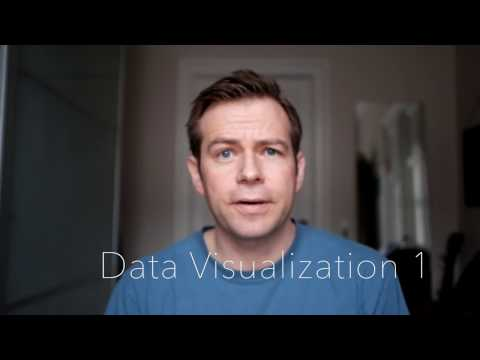

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('yiU56codNlI', width=800, height=450)

> *Excercise:* Questions for the lecture. 
>
> * As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?
> * What is the difference between a bar-chart and a histogram?
> * I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it.
> * 
<div class="alert alert-block alert-info">
Answer in your own words based on the video, <b>don't use your LLM</b>. Once you've written down your answers, it's OK to use the LLM to get better. 
</div>

# Answers

## Pearson correlation

Describes the linear correlation between two sets of data (x, y). It ranges from -1 to 1. A value of 1 means there is a perfect correlation, while a value of 0 means no correlation at all.    
The idea that Pearson had, can be well described in [this image](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#/media/File:Correlation_examples2.svg). But the image also shows, that a Pearson correlation of 0 has a lot of different shapes.

## Bar-chart vs. histogram

A bar-chart we know (duh), while a histogram contains a "bin" value, usually has frequency/count/no. of occourences on the y-axis.

## Correct bin-size

I like Seaborn's way of choosing the right bin size, which uses the [Freedman-Diaconis rule](https://en.wikipedia.org/wiki/Freedman–Diaconis_rule).

> Seaborn uses NumPy’s auto bin selection method, which selects the maximum bin count between sturges and fd (Freedman-Diaconis) rules. This often provides a better starting point for exploration by ensuring sufficient detail in the visualization.


## Part 2: Reading about the theory of visualization

Since we can go deeper with the visualization this year, we are going to read the first couple of chapters from [*Data Analysis with Open Source Tools*](http://shop.oreilly.com/product/9780596802363.do) (DAOST). It's pretty old, but I think it's a fantastic resource and one that is pretty much as relevant now as it was back then. The author is a physicist (like Sune) so he likes the way he thinks. And the books takes the reader all the way from visualization, through modeling to computational mining. Anywho - it's a great book and well worth reading in its entirety. 

As part of this class we'll be reading the first chapters. Today, we'll read chaper 2 (the first 28 pages) which supports and deepens many of the points we made during the video above. 

To find the text, you will need to go to **Teams** and have a look under the `Files` tab. The path is `/Documents/General/Week3/DAOST_chapter1.pdf`.

> *Excercise*: Questions for DAOST 
> * Explain in your own words the point of the jitter plot.
> * Explain in your own words the point of figure 2-3. (I'm going to skip saying "in your own words" going forward, but I hope you get the point; I expect all answers to be in your own words).
> * The author of DAOST (Philipp Janert) likes KDEs (and think they're better than histograms). And we don't. Sune didn't give a detailed explanation in the video, but now that works to our advantage. We'll ask you to think about this and thereby create an excellent exercise: When can KDEs be misleading? 
> * Sune discussed some strengths of the CDF - there are also weaknesses. Janert writes "CDFs have less intuitive appeal than histograms of KDEs". What does he mean by that?
> * What is a *Quantile plot*? What is it good for. 
> * How is a *Probablity plot* defined? What is it useful for? Have you ever seen one before?
> * One of the reasons we like DAOST is that Janert is so suspicious of mean, median, and related summary statistics. Explain why one has to be careful when using those - and why visualization of the full data is always better. 
> * Sune loves box plots (but not enough to own one of [these](https://images.app.goo.gl/rpozyRX3xu5oFobt8) 😂). When are box plots most useful?
> * The book doesn't mention [violin plots](https://en.wikipedia.org/wiki/Violin_plot). Are those better or worse than box plots? Why?
> * Remember the box-plot part from [this video from last time](https://www.youtube.com/watch?v=DbJyPELmhJc) (the part that starts at 0:56)? Explain in your own words how this video illustrates potential issues even with box-plots? Do violin-plots help with that issue?

<div class="alert alert-block alert-info">
Answer without the help of your LLM and your goal is to learn from reading the text. but feel free to add more nuance by asking it questions.
</div>

In [ ]:
# packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [60]:
# fav seaborn style
plt.style.use("seaborn-v0_8-pastel")
plt.rcParams['font.family'] = 'helvetica'

In [83]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'])

columns_to_keep_03_18 = [
    "Category", "Descript", "DayOfWeek", "Date", "Time", "X", "Y"
]

# Load datasets using only relevant columns
df_crimes = pd.read_csv('./res/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20250204.csv', usecols=columns_to_keep_03_18, parse_dates=['Date'])

## Part 3: Visualizations based on the book

> *Excercise Part 1*: Connecting the dots and recreating plots from DAOST but using our own favorite dataset.
>
> <font color="grey"></font>
> 
> * Let's make a jitter-plot (that is, code up something like **Figure 2-1** from DAOST from scratch), but based on *SF Police data*. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the **exact** time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.
> * Last time, we did lots of bar-plots. Today, we'll play around with histograms (creating two crime-data based versions of the plot-type shown in DAOST **Figure 2-2**). I think the GPS data could be fun to see this way. 
>   * This time, pick two crime-types with different geographical patterns **and** a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
>   * Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like `numpy.histogram`. This function gives you the counts and then you do your own plotting. 
> * Next up is using the plot-type shown in **Figure 2-4** from DAOST, but with the data you used to create Figure 2.1. There is not a single great way to create kernel density plots in Python. [Here](https://www.geeksforgeeks.org/density-plots-with-pandas-in-python/), you'll finde a pandas based strategy, but you can also use `gaussian_kde` from `scipy.stats` ([for an example, check out this stackoverflow post](https://stackoverflow.com/questions/4150171/how-to-create-a-density-plot-in-matplotlib)) or you can use [`seaborn.kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html). There is also another nice tutorial for KDE plots [here](https://medium.com/towards-data-science/histograms-and-density-plots-in-python-f6bda88f5ac0). <font color="gray">Or ask your LLM what it recommends</font>.
> * Now grab 25 random timepoints from the dataset (of 1000-10000 original data) you've just plotted and create a version of Figure 2-4 based on the 25 data points. Does this shed light on why I think KDEs can be misleading? 
>
> Let's take a break. Get some coffee or water. Stretch your legs. Talk to your friends for a bit. Breathe. Get relaxed so you're ready for the second part of the exercise. 


<div class="alert alert-block alert-info">
For the "Exercise Part 1" and the part below, I want you to eliminate uses of LLMs where you simply cut and paste the assignments (or parts of it) into a prompt ... and ask for a solution. Instead, ask your LLM for help if you get stuck ... use it as a TA to help understand error messages ... or to help make suggestions for the right function to use ... etc. 
</div>

/Users/rakul/miniconda3/envs/social-datavis/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rakul/miniconda3/envs/social-datavis/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rakul/miniconda3/envs/social-datavis/lib/python3.13/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Time'>

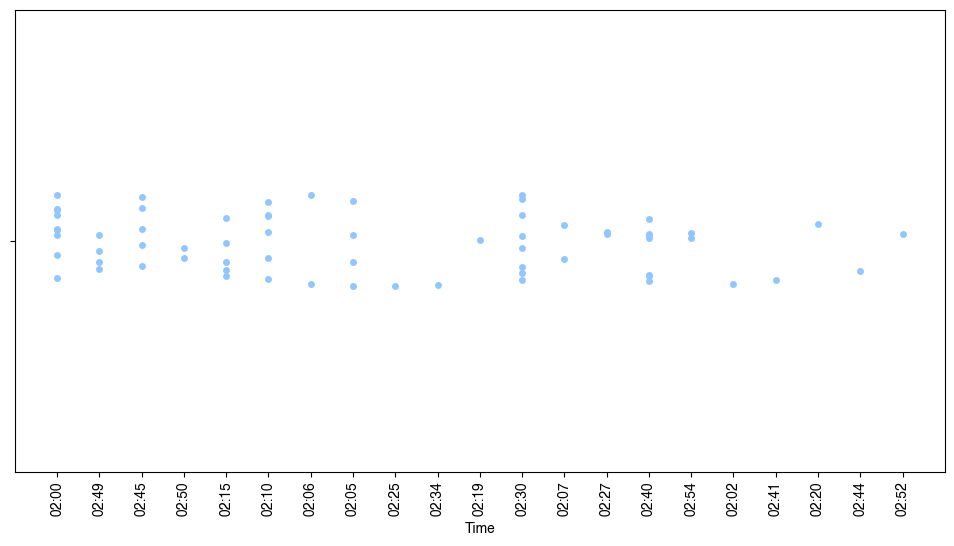

In [ ]:
# retrieve only prostitution category
df_prostitution = df_crimes[df_crimes["Category"] == "PROSTITUTION"]
date_range = pd.Series(pd.date_range("2011-03-01", "2011-07-31"))

# Filter the dataframe for the specified date range and time range
df_prostitution_filtered = df_prostitution[(df_prostitution['Date'].isin(date_range)) & 
                                           (df_prostitution['Time'].str[:2].astype(int) == 2)]

plt.figure(figsize=(12, 6))  # Set figure size
plt.tick_params(axis='x', labelrotation=90)
sns.stripplot(df_prostitution_filtered, x="Time")

/Users/rakul/miniconda3/envs/social-datavis/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rakul/miniconda3/envs/social-datavis/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


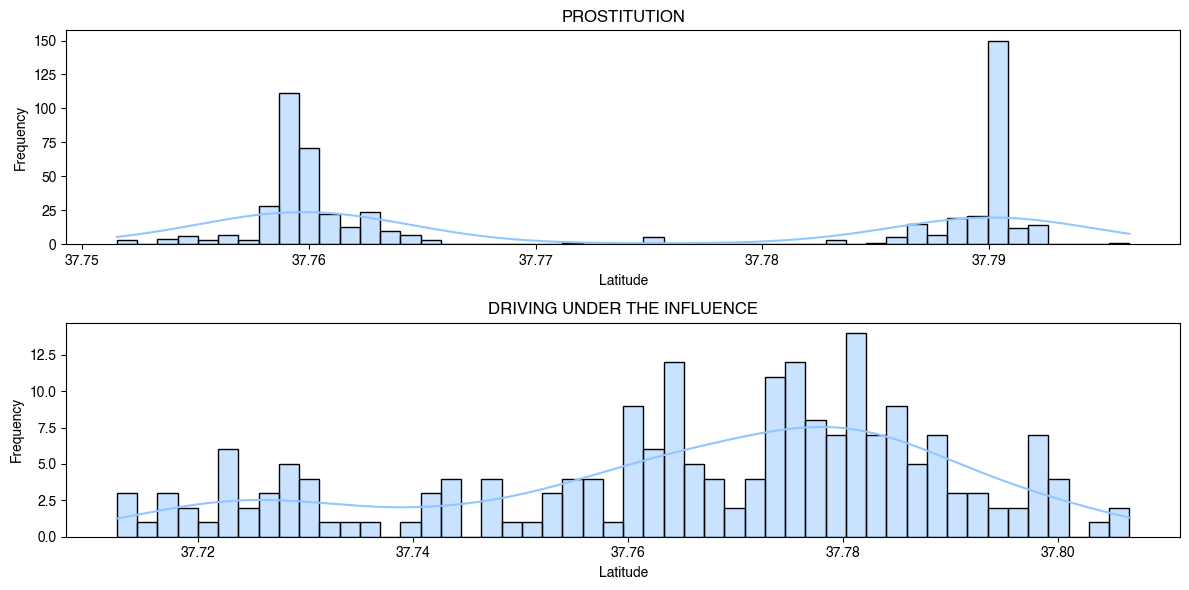

In [99]:


# Richmond - drug/narcotic
# Mission - prostitution
# we want Y
crimes = ["PROSTITUTION", "DRIVING UNDER THE INFLUENCE"]
df_twocrimes = df_crimes[df_crimes["Category"].isin(crimes)]
date_range = pd.Series(pd.date_range("2011-03-01", "2011-07-31"))

df_filtered = df_twocrimes[df_twocrimes["Date"].isin(date_range)]

# Create histogram with 50 bins
fig, ax = plt.subplots(2, 1, figsize=(12, 6))

for i, crime in enumerate(crimes):
    df_crime = df_filtered[df_filtered["Category"] == crime]
    sns.histplot(df_crime['Y'], bins=50, ax=ax[i], kde=True)
    ax[i].set_title(f'{crime}')
    ax[i].set_xlabel('Latitude')
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



> 
> *Excercise Part 2*:
>
> * Now we'll work on creating two versions of the plot in **Figure 2-11**, but using the GPS data you used for your version of Figure 2-2. Comment on the result. It is not easy to create this plot from scracth.    
>   * **Hint:** Take a look at the `scipy.stats.probplot` function. 
> * OK, we're almost done, but we need some box plots. Here, I'd like you to use the box plots to visualize fluctuations of how many crimes happen per day. We'll use data from the 15 focus crimes defined last week.
>   * For the full time-span of the data, calulate the **number of crimes per day** within each category for the entire duration of the data.
>   * Create a box-and whiskers plot showing the mean, median, quantiles, etc for all 15 crime-types side-by-side. There are many ways to do this. I like to use [matplotlibs's built in functionality](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html), but you can also achieve good results with [seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html) or [pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html). <font color="gray">It's also fine to get help from your LLM, but make sure you check that the plot accurately shows the stats about the underlying data!</font>.
>   * What does this plot reveal that you can't see in the plots from last time?
> * Also I want to show you guys another interesting use of box plots. To get started, let's calculate another average for each focus-crime, namely what time of day the crime happens. So this time, the distribution we want to plot is the average time-of-day that a crime takes place. There are many ways to do this, but let me describe one way to do it. 
>   * For datapoint, the only thing you care about is the time-of-day, so discard everything else.
>   * You also have to deal with the fact that time is annoyingly not divided into nice units that go to 100 like many other numbers. I can think of two ways to deal with this.
>     * For each time-of-day, simply encode it as seconds since midnight.
>     * Or keep each whole hour, and convert the minute/second count to a percentage of an hour. So 10:15 $\rightarrow$ 10.25, 8:40 $\rightarrow$ 8.67, etc.
> * Now you can create box-plots to create an overview of *when various crimes occur*. Note that these plot have quite a different interpretation than ones we created in the previous exercise. Cool, right?  

## Part 4: Visualizing geodata with Plotly

So visualizing geodata used to be difficult, but with `Plotly` things have gotten easier. 

Like matplotlib, Plotly is an [open-source data visualization library](https://plotly.com/python/), but it's aimed at making interactive visualizations that can be rendered in a web browser (or jupyter notebook). You can read about it and learn how to install it [here](https://plotly.com/python/getting-started/).

That means that we can easily draw on the fact that the crime data has lots of exciting geo-data attached. The map we're going to be creating is called a **[choropleth map](https://en.wikipedia.org/wiki/Choropleth_map)** (more on these later), which is basically a map, where we color in shapefiles (more on this below) based on some value that we care about. We'll take our inspiration from Plotly's gentle intro to [Choropleth maps](https://plotly.com/python/mapbox-county-choropleth/)

The thing we want to look into is the SF police districts, shown below (image stolen from [this page](https://hoodline.com/2015/07/citywide-sfpd-redistricting-to-take-effect-sunday/)).

![districts from web](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/sfpdfinal.png)

But because we are cool programmers, we want to create our own maps, **with our own information on them**. Let's do it!

> *Exercise*: Let's plot a map with some random values in it. <font color="gray"></font>

<div class="alert alert-block alert-info">
For this exercise, it will be tempting to ask your LLM for a lot of help ... but - again - don't let it do the work for you. Use it as a helper - not an end-to-end solution. There are many new concepts to understand, and doing the exercise yourself is the best way to begin to get the nitty-gritty details of maps and shapefiles under your skin. Once you get the idea of shapefiles and how they work into your human head, it will unlock new & powerful ways of thinking.
</div>

> What we need to do to get going is some random data. Below is a little dictionary with a random value for each district.

In [2]:
randomdata = {
    'CENTRAL': 0.4821,
    'SOUTHERN': 0.9153,
    'BAYVIEW': 0.3674,
    'MISSION': 0.7542,
    'PARK': 0.6285,
    'RICHMOND': 0.2147,
    'INGLESIDE': 0.05391,
    'TARAVAL': 0.007846,
    'NORTHERN': 0.4938,
    'TENDERLOIN': 0.08127
}

> *Exercise* (continued):
>
> For this exercise, we'll use use the random values above and we'll also need some *shape-files*.
> [Shapefiles can have many different formats](https://en.wikipedia.org/wiki/Shapefile). Because we are brilliant teachers and an all-round standup people, we are sharing the shapefiles as [`geojson`](https://en.wikipedia.org/wiki/GeoJSON), which is an easy-to-use format for shapefiles based on `json`.
>
> * Download the SFPD District shapefiles **[here](https://raw.githubusercontent.com/suneman/socialdata2025/main/files/sfpd.geojson)**
> * Now that you have the shapefiles, you can follow the example here: https://plotly.com/python/mapbox-county-choropleth/ but with the following modifications:
>    * In the example the `id` is a so-called FIPS code. In our case the `id` is the `DISTRICT`
>    * You will have to convert the dictionary of random values I included above to a Pandas dataframe with the right column headings.
>    * The data used in the example has a range between zero and 12. Your data is between $[0,1]$. So you'll need to modify the plotting command to accound for that change.
>    * You should also change the map to display the right zoom level.
>    * And the map should center on San Francisco's `lat` and `lon`.
> * Now you can create your map.

Mine looks something like this (but I've changed the random values to make it more fun, so expect your colors to be different.).



<img src="https://raw.githubusercontent.com/suneman/socialdata2025/main/files/map_example.png" alt="example" style="width:800px;"/>

You're encouraged to play around with other settings, color schemes, etc.

> *Exercise:* But it's crime-data. Let's do something useful and **visualize where it is safest to leave your car on a Sunday**.
> 
> Take a moment to congratulate yourself. You now know how to create cool map plots!
> * Now, we can focus on our main goal: *determine the districts where you should (and should not) leave your car on Sundays*. (Or stated differently, count up the number of thefts.)
> * To do so, first:
>  * Filter the crime dataset by the `DayOfWeek` category and also choose the appropriate crime category.
>  * Aggregate data by police district.
> * To create the plot, remember that your range of data-values is different from before, so you'll have to change the plotly command a bit.
> * Create a nice plot that shows the crime-levels and highlights the safest area. Remember that we want a colorbar to explain what the colors mean ... and all the other formatting needed for a nice plot.
> * Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?
> * Using visualizatios can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. *perceptual errors*):
>    * Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident? 
>    * Why do you think perceptual errors are a problem? Try to think of a few examples. You can have a look at this [article](https://www.businessinsider.com/fox-news-obamacare-chart-2014-3?r=US&IR=T) to get some inspiration.
> * <font color="gray">Optional LLM challenge: Use your LLM and your existing code to easily create plots for the same crime type, but different days, and comment on the results.</font>

<div class="alert alert-block alert-info">
For this final exercise, go nuts with using your LLM (but this is only OK if you've already solved the previous one on your own).
</div>